In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
df=pd.read_csv(r"C:\Users\Muhammad Fahad\Documents\myPythonWork\datasets\heart.csv")

In [273]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Dictionary 
age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

# UNDERSTANDING THE DATA

In [274]:
df.rename(columns = {'sex':'gender', 'cp':'chestPain','trtbps':'restBp', 'fbs':'FstBlodSugar','restecg':'restECG', 'thalachh':'MxHrtRateAch','caa':'NoMjrVesls', 'thall':'thaliumStrssTest','exng':'ExrsiseAngina','slp':'slope'}, inplace = True)

In [275]:
df.head()

,age,gender,chestPain,restBp,chol,FstBlodSugar,restECG,MxHrtRateAch,ExrsiseAngina,oldpeak,slope,NoMjrVesls,thaliumStrssTest,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               303 non-null    int64  
 1   gender            303 non-null    int64  
 2   chestPain         303 non-null    int64  
 3   restBp            303 non-null    int64  
 4   chol              303 non-null    int64  
 5   FstBlodSugar      303 non-null    int64  
 6   restECG           303 non-null    int64  
 7   MxHrtRateAch      303 non-null    int64  
 8   ExrsiseAngina     303 non-null    int64  
 9   oldpeak           303 non-null    float64
 10  slope             303 non-null    int64  
 11  NoMjrVesls        303 non-null    int64  
 12  thaliumStrssTest  303 non-null    int64  
 13  output            303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [277]:
# For Counting unique values we set a function

In [331]:
udict = {}
for i in list(df.columns):
    udict[i] = df[i].value_counts().shape[0]
pd.DataFrame(udict,index=['Unique_Values_count']).transpose()

,Unique_Values_count
age,41
gender,2
chestPain,4
restBp,49
chol,152
FstBlodSugar,2
restECG,3
MxHrtRateAch,91
ExrsiseAngina,2
oldpeak,40


In [279]:
# Seperating the Categorical and non Categoraical Columns

In [280]:
cat_cols = ['gender','ExrsiseAngina','NoMjrVesls','chestPain','FstBlodSugar','restECG','slope','thaliumStrssTest']

Non_cat_cols = ["age","restBp","chol","MxHrtRateAch","oldpeak"]

target_col = ["output"]

In [281]:
df[cat_cols].head(5)

,gender,ExrsiseAngina,NoMjrVesls,chestPain,FstBlodSugar,restECG,slope,thaliumStrssTest
0,1,0,0,3,1,0,0,1
1,1,0,0,2,0,1,0,2
2,0,0,0,1,0,0,2,2
3,1,0,0,1,0,1,2,2
4,0,1,0,0,0,1,2,2


In [292]:
df[Non_cat_cols].head(3)

,age,restBp,chol,MxHrtRateAch,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4


In [293]:
df[Non_cat_cols].describe()

,age,restBp,chol,MxHrtRateAch,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [139]:
df.isnull().sum()

age                 0
gender              0
chestPain           0
restBp              0
chol                0
FstBlodSugar        0
restECG             0
MxHrtRateAch        0
ExrsiseAngina       0
oldpeak             0
slope               0
NoMjrVesls          0
thaliumStrssTest    0
output              0
dtype: int64

# Perform EDA

In [140]:
# checking the variants of categorical DATA

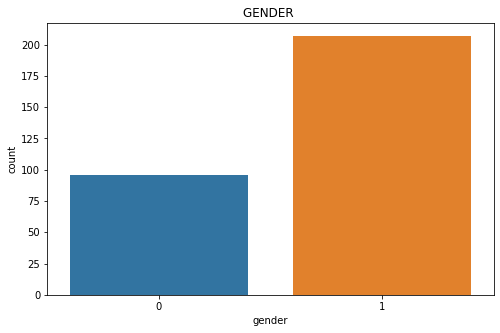

In [160]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df)
plt.title('GENDER ')
plt.show()

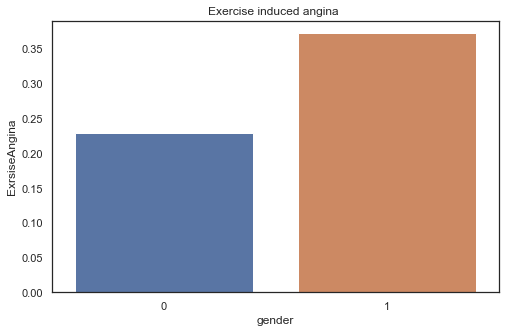

In [335]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='ExrsiseAngina',  data=df, ci=None)
plt.title('Exercise induced angina ')
plt.show()

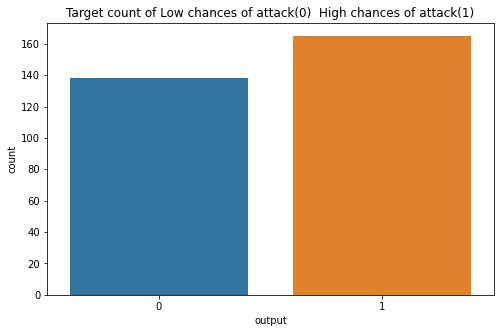

In [190]:
ax1= fig = plt.figure(figsize=(8,5))
sns.countplot(x='output',  data=df)
plt.title('Target count of Low chances of attack(0)  High chances of attack(1)')
plt.show()

Text(0.5, 1.0, 'Distribution of Maximum Heart Achived Rate VS Target Variable')

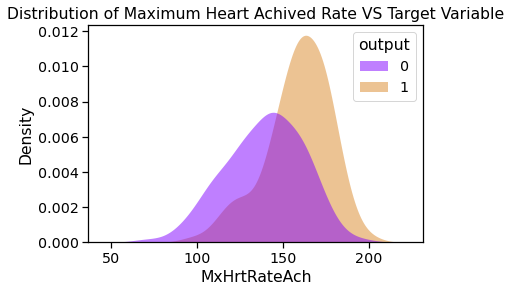

In [247]:
sns.kdeplot(data=df, x='MxHrtRateAch',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
plt.title('Distribution of Maximum Heart Achived Rate VS Target Variable')

Text(0.5, 1.0, 'Distribution fastning Sugare  Rate VS Target Variable')

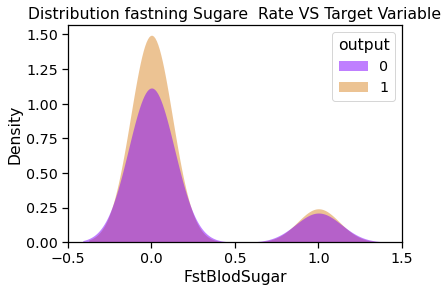

In [248]:
sns.kdeplot(data=df, x='FstBlodSugar',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
plt.title('Distribution fastning Sugare  Rate VS Target Variable')

Text(0.5, 1.0, 'old paeak  Rate VS Target Variable')

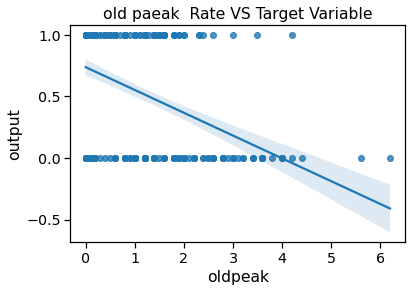

In [253]:
sns.regplot(data=df, x='oldpeak',y="output")
plt.title('old paeak  Rate VS Target Variable')

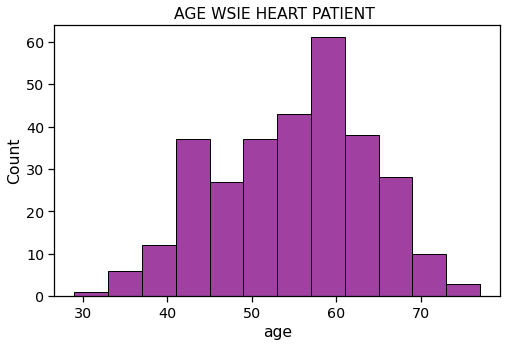

In [255]:
fig = plt.figure(figsize=(8,5))
sns.histplot(x='age',  data=df, color='purple')
plt.title('AGE WSIE HEART PATIENT ')
plt.show()

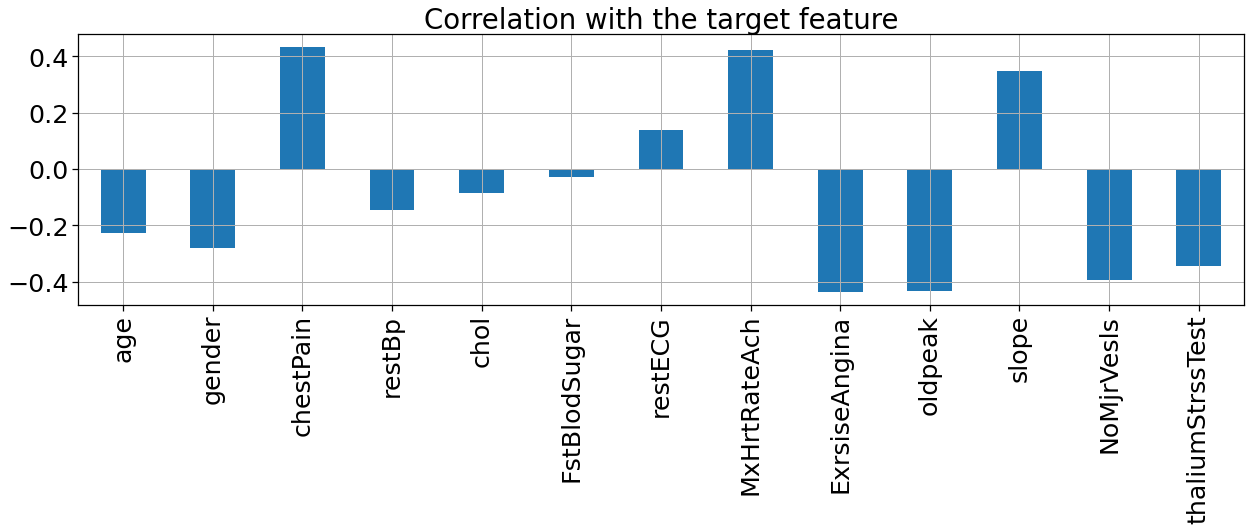

In [230]:
sns.set_context(font_scale = 1)
df.drop('output', axis=1).corrwith(df.output).plot(kind='bar', grid=True, figsize=(18, 8),
title="Correlation with the target feature")
plt.tight_layout()

Text(0.5, 1.0, 'HeatMap of Non -Categoraical Values')

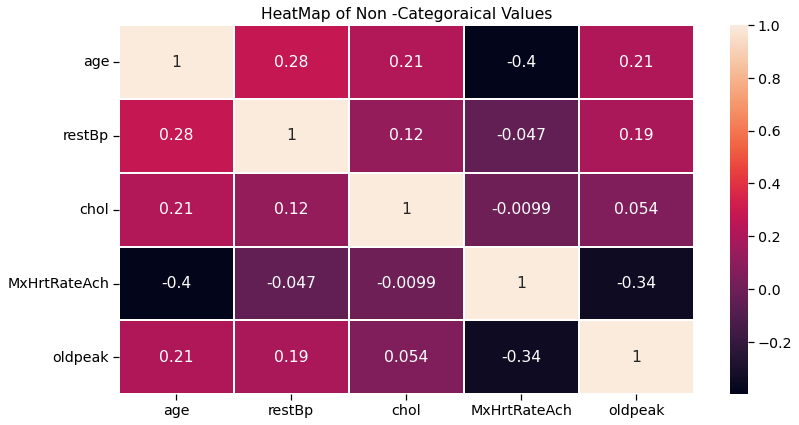

In [261]:
plt.figure(figsize=(12,6))
sns.set_context(font_scale = 1.3)
sns.heatmap(df[Non_cat_cols].corr(),annot=True,linewidth =2)
plt.tight_layout()
plt.title("HeatMap of Non -Categoraical Values")

Text(0.5, 1.0, 'HeatMap of Categoraical Values')

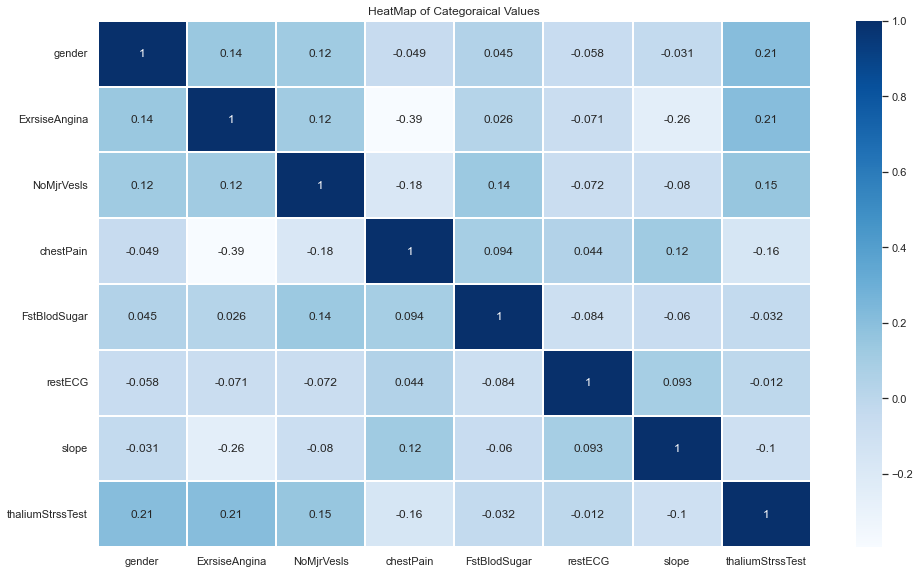

In [306]:
plt.figure(figsize=(14,8))

sns.set(style="white") 
sns.set_context(font_scale = 1.3)
sns.heatmap(df[cat_cols].corr(),annot=True,linewidth =2,cmap='Blues')
plt.tight_layout()
plt.title("HeatMap of Categoraical Values")

<Figure size 1008x576 with 0 Axes>

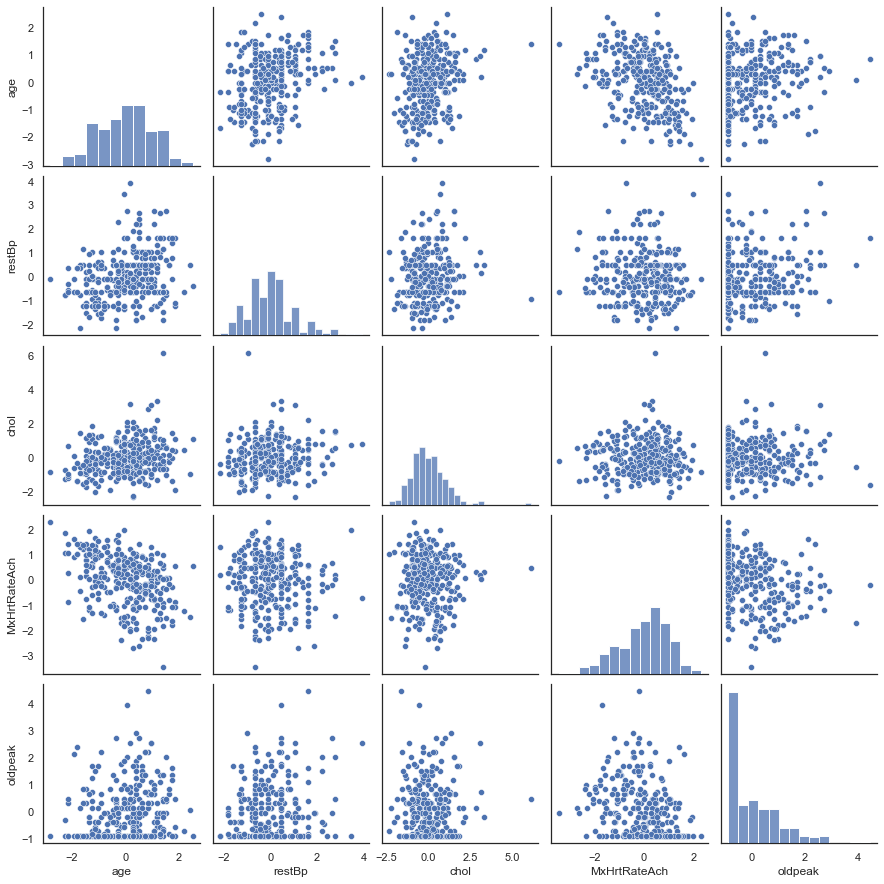

In [308]:
plt.figure(figsize=(14,8))
sns.pairplot(data=df[Non_cat_cols])
plt.show()

In [262]:
# Now we will be using the standard scaler method to scale down the data

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = Non_cat_cols
df[col_to_scale] = sc.fit_transform(df[col_to_scale])
df.head(6)

,age,gender,chestPain,restBp,chol,FstBlodSugar,restECG,MxHrtRateAch,ExrsiseAngina,oldpeak,slope,NoMjrVesls,thaliumStrssTest,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1


In [301]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('output', axis=1)

y = df.output


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [338]:
X

,age,gender,chestPain,restBp,chol,FstBlodSugar,restECG,MxHrtRateAch,ExrsiseAngina,oldpeak,slope,NoMjrVesls,thaliumStrssTest
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


# model implementation

In [339]:
# importing the models that can be used

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# impoerting Metrics
from sklearn.metrics import accuracy_score

# 01 SVM Model


In [347]:
clf = SVC(kernel='sigmoid', C=2, random_state=80).fit(X_train,y_train)

# predicting  values
y_pred = clf.predict(X_test)

# checking the accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))


The test accuracy score of SVM is  0.8241758241758241


# 02 logistic regression model

In [324]:
logreg = LogisticRegression()

# fit the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred1 = logreg.predict(X_test)

# # printing the test accuracy
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred1))



The test accuracy score of Logistic Regression is  0.8131868131868132



# 03 DecisionTree model

In [326]:
# instantiating the object
dt_modl = DecisionTreeClassifier(random_state = 50)

# fitting the model
dt_modl.fit(X_train, y_train)

# calculating the predictions
y_pred2 = dt_modl.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred2))

The test accuracy score of Decision Tree is  0.7362637362637363



# 04 RandomForest model

In [329]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred3 = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred3))

The test accuracy score of Random Forest is  0.8241758241758241
